In [1]:
import numpy as np
import pandas as pd
import cv2

In [2]:
seed = 1234

In [3]:
import matplotlib.pyplot as plt

In [218]:
def showImage(filePath):
    ar = cv2.resize(np.loadtxt(filePath), dsize = (50,50));
    #ar = cv2.GaussianBlur(ar, (3,3), 0)
    plt.imshow(ar)
    plt.colorbar()

In [5]:
def showHist(filePath):
    ar = cv2.resize(np.loadtxt(filePath), dsize = (50,50));
    ar = cv2.GaussianBlur(ar, (11,11), 0)
    ar = ar.reshape(2500);
    print(plt.hist(ar, bins=50))
    plt.show()

### DOUBLE 

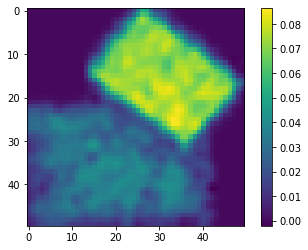

In [6]:
showImage("DATASET/DOUBLE/00_00.dat");

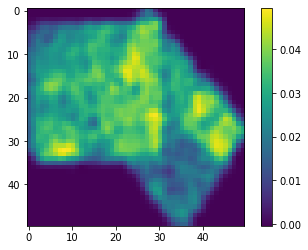

In [7]:
showImage("DATASET/DOUBLE/01_00.dat");

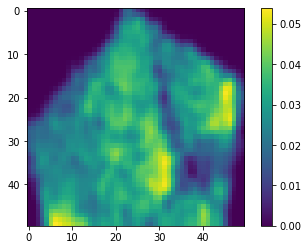

In [8]:
showImage("DATASET/DOUBLE/02_00.dat");

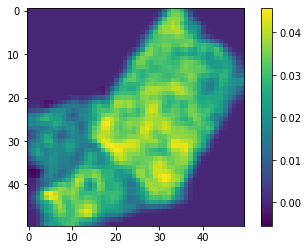

In [9]:
showImage("DATASET/DOUBLE/03_00.dat");

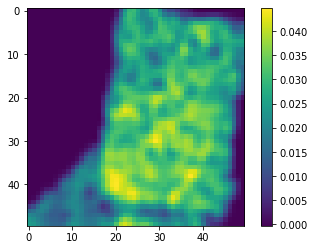

In [10]:
showImage("DATASET/DOUBLE/04_00.dat");

### ENVELOPE 

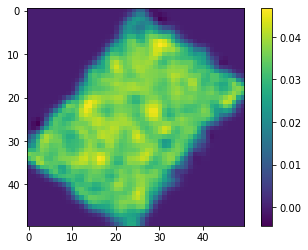

In [11]:
showImage("DATASET/ENVELOPE/05052015-01_04_24_688_00.dat");

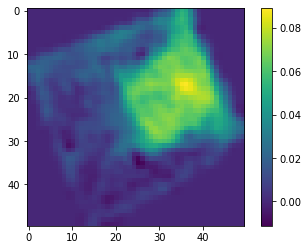

In [12]:
showImage("DATASET/ENVELOPE/05052015-01_08_07_419_00.dat");

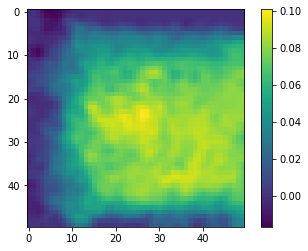

In [13]:
showImage("DATASET/ENVELOPE/20161213_123830164_00.dat");

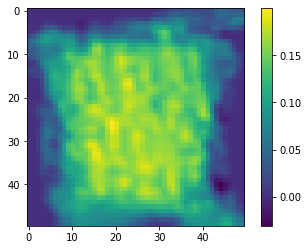

In [14]:
showImage("DATASET/ENVELOPE/20150923_094544497_00.dat");

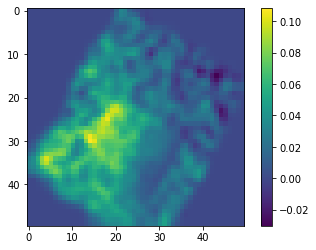

In [15]:
showImage("DATASET/ENVELOPE/20150923_095058605_00.dat");

### OTHER 

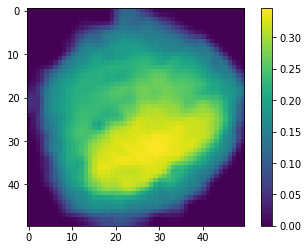

In [16]:
showImage("DATASET/OTHER/05052015-01_04_02_753_00.dat");

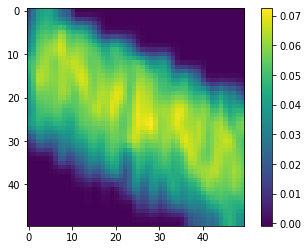

In [17]:
showImage("DATASET/OTHER/20150923_100028182_00.dat");

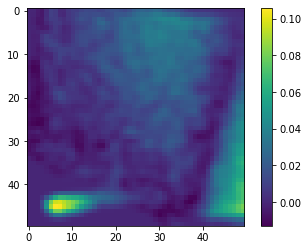

In [18]:
showImage("DATASET/OTHER/20150925_094400974_00.dat");

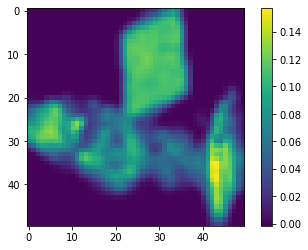

In [19]:
showImage("DATASET/OTHER/20151110_133319736_00.dat");

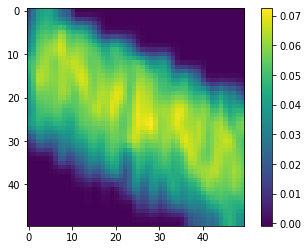

In [20]:
showImage("DATASET/OTHER/20150923_100028182_00.dat");

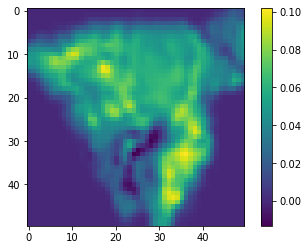

In [21]:
showImage("DATASET/OTHER/27052015-04_16_59_838_00.dat");

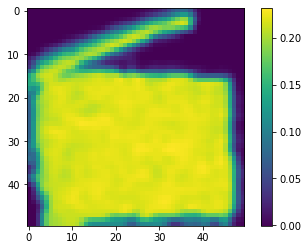

In [22]:
showImage("DATASET/OTHER/20150923_120902648_00.dat");

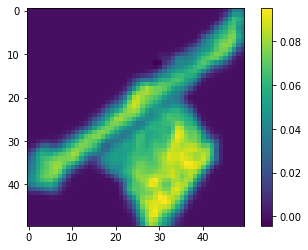

In [23]:
showImage("DATASET/OTHER/20151110_132958447_00.dat");

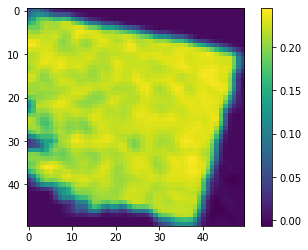

In [24]:
showImage("DATASET/OTHER/26052015-04_40_18_193_00.dat");

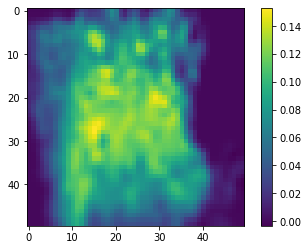

In [25]:
showImage("DATASET/OTHER/27052015-04_16_58_023_00.dat");

###  PARCEL

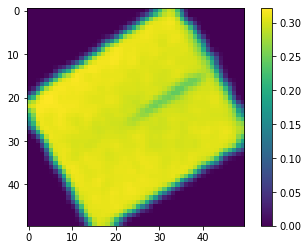

In [26]:
showImage("DATASET/PARCEL/20052015-06_30_23_559_00.dat");

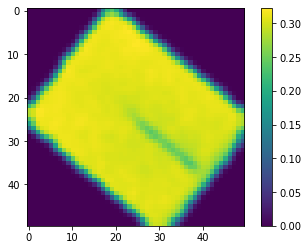

In [27]:
showImage("DATASET/PARCEL/20052015-06_30_37_556_00.dat");

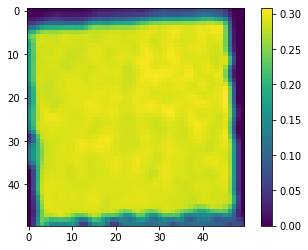

In [28]:
showImage("DATASET/PARCEL/20150923_112206898_00.dat");

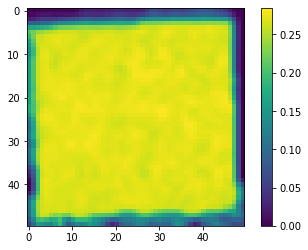

In [29]:
showImage("DATASET/PARCEL/20150923_121600891_00.dat");

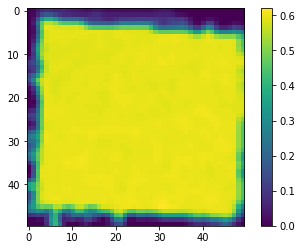

In [30]:
showImage("DATASET/PARCEL/20150923_132356572_00.dat");

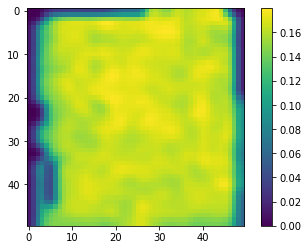

In [31]:
showImage("DATASET/PARCEL/20150925_102434234_00.dat");

209.0


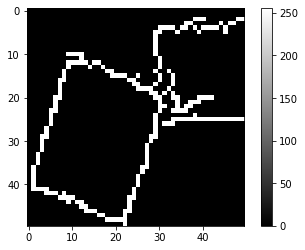

In [201]:
baseImage = cv2.resize(np.loadtxt("DATASET/DOUBLE/20161219_192054418_01.dat"), dsize = (50,50));

blur3 = cv2.GaussianBlur(baseImage, (3,3), 0)
blur11 = cv2.GaussianBlur(baseImage, (11,11), 0)

rng = np.max(blur3)-np.min(blur3)
area = np.sum(blur3 > rng*0.01);

dx = cv2.Sobel(blur3, cv2.CV_64F,1,0,ksize=3);
dxx = cv2.Sobel(dx, cv2.CV_64F,1,0,ksize=3);
dy = cv2.Sobel(blur3, cv2.CV_64F,0,1,ksize=3);
dyy = cv2.Sobel(dy, cv2.CV_64F,0,1,ksize=3);

mag, deg = cv2.cartToPolar(dx, dy, angleInDegrees=True);
mag2, deg2 = cv2.cartToPolar(dxx, dyy, angleInDegrees=True);

baseImage = cv2.convertScaleAbs(baseImage*255) 
edges = cv2.Canny(baseImage,25,50)

print(np.sum(edges/255))
plt.imshow(edges, cmap = 'gray')
plt.colorbar()

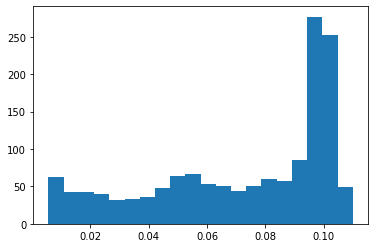

In [214]:
baseImage = cv2.resize(np.loadtxt("DATASET/DOUBLE/20161219_192054418_01.dat"), dsize = (50,50));

blur3 = cv2.GaussianBlur(baseImage, (3,3), 0)
hist = plt.hist(blur3[np.where(blur3 > rng*0.05)].flatten(),bins=20)[0];
plt.show()

h1 = np.sum(hist[0:4]);
h2 = np.sum(hist[4:8]);
h3 = np.sum(hist[8:12]);
h4 = np.sum(hist[12:16]);
h5 = np.sum(hist[16:20]);

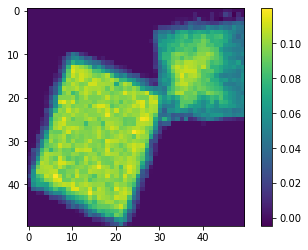

In [219]:
showImage("DATASET/DOUBLE/20161219_192054418_01.dat");

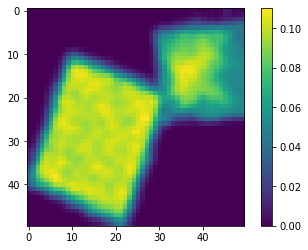

In [217]:
showImage("DATASET/DOUBLE/20161219_192054418_01.dat");

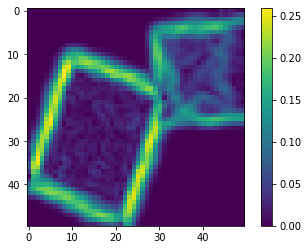

In [208]:
baseImage = cv2.resize(np.loadtxt("DATASET/DOUBLE/20161219_192054418_01.dat"), dsize = (50,50));

blur3 = cv2.GaussianBlur(baseImage, (3,3), 0)
rng = np.max(blur3)-np.min(blur3)
area = np.sum(blur3 > rng*0.01);

dx = cv2.Sobel(blur3, cv2.CV_64F,1,0,ksize=3);
dy = cv2.Sobel(blur3, cv2.CV_64F,0,1,ksize=3);

mag, deg = cv2.cartToPolar(dx, dy, angleInDegrees=True);

maxMagOnArea = np.max(mag[np.where(blur3 > rng*0.05)])

plt.imshow(mag)
plt.colorbar()

# Load images and feature extraction

In [34]:
import glob

In [35]:
doubleFiles = np.array(glob.glob("./DATASET/DOUBLE/*.dat"))
envelopeFiles = np.array(glob.glob("./DATASET/ENVELOPE/*.dat"))
otherFiles = np.array(glob.glob("./DATASET/OTHER/*.dat"))
parcelFiles = np.array(glob.glob("./DATASET/PARCEL/*.dat"))

allFiles = np.concatenate((doubleFiles, envelopeFiles, parcelFiles));

print("Double: ",doubleFiles.size)
print("Envelope: ",envelopeFiles.size)
print("Other: ",otherFiles.size)
print("Parcel: ",parcelFiles.size)
print("Tot: ",allFiles.size)

Double:  471
Envelope:  879
Other:  58
Parcel:  702
Tot:  2052


In [36]:
def preprocessImage(imgPath):
    baseImage = cv2.resize(np.loadtxt(imgPath), dsize = (50,50));
    
    blur3 = cv2.GaussianBlur(baseImage, (3,3), 0)
    blur11 = cv2.GaussianBlur(baseImage, (11,11), 0)
    rng = np.max(blur3)-np.min(blur3)
    area = np.sum(blur3 > rng*0.01);
    
    dx = cv2.Sobel(blur3, cv2.CV_64F,1,0,ksize=3);
    dxx = cv2.Sobel(dx, cv2.CV_64F,1,0,ksize=3);
    dy = cv2.Sobel(blur3, cv2.CV_64F,0,1,ksize=3);
    dyy = cv2.Sobel(dy, cv2.CV_64F,0,1,ksize=3);

    mag, deg = cv2.cartToPolar(dx, dy, angleInDegrees=True);
    mag2, deg2 = cv2.cartToPolar(dxx, dyy, angleInDegrees=True);
    
    avgHeightOnArea = np.mean(blur3[np.where(blur3 > rng*0.05)])
    varHeightOnArea = np.var(blur3[np.where(blur3 > rng*0.05)])
    
    avgMagOnArea = np.mean(mag[np.where(blur3 > rng*0.05)])
    avgMag2OnArea = np.mean(mag2[np.where(blur3 > rng*0.05)])
    
    sumMagOnArea = np.sum(mag[np.where(blur3 > rng*0.05)])
    sumMag2OnArea = np.sum(mag2[np.where(blur3 > rng*0.05)])
    
    varMagOnArea = np.mean(deg[np.where(blur3 > rng*0.05)])
    varMag2OnArea = np.mean(deg2[np.where(blur3 > rng*0.05)])
    
    maxMagOnArea = np.max(mag[np.where(blur3 > rng*0.05)])
    maxMag2OnArea = np.max(mag2[np.where(blur3 > rng*0.05)])
    
    baseImage = cv2.convertScaleAbs(baseImage*255) 
    edges1 = cv2.Canny(baseImage,5,20)
    nEdges1 = np.sum(edges1);
    
    edges2 = cv2.Canny(baseImage,10,30)
    nEdges2 = np.sum(edges2);
    
    edges3 = cv2.Canny(baseImage,25,50)
    nEdges3 = np.sum(edges3);
    
    edges4 = cv2.Canny(baseImage,30,70)
    nEdges4 = np.sum(edges4);
    
    hist = np.histogram(blur3[np.where(blur3 > rng*0.05)].flatten(),bins=20)[0];
    
    h1 = np.sum(hist[0:4]);
    h2 = np.sum(hist[4:8]);
    h3 = np.sum(hist[8:12]);
    h4 = np.sum(hist[12:16]);
    h5 = np.sum(hist[16:20]);
    
    q75 = np.quantile(mag, 0.75);
    q85 = np.quantile(mag, 0.85);
    
    return np.array([rng, area, avgHeightOnArea, varHeightOnArea, avgMagOnArea,  avgMag2OnArea, varMagOnArea, varMag2OnArea, maxMagOnArea, maxMag2OnArea, sumMagOnArea, sumMag2OnArea, nEdges1, nEdges2, nEdges3, nEdges4, h1,h2,h3,h4,h5,q75,q85
                    ]);

In [37]:
preprocessImage("DATASET/PARCEL/20150923_112206898_00.dat")

array([3.07306291e-01, 2.41000000e+03, 2.56054420e-01, 5.24212802e-03,
       1.39850546e-01, 6.46076088e-01, 1.76375767e+02, 1.78582901e+02,
       9.63426083e-01, 3.75162111e+00, 3.33683404e+02, 1.54153754e+03,
       1.46370000e+05, 8.05800000e+04, 5.48250000e+04, 5.48250000e+04,
       1.30000000e+02, 1.38000000e+02, 1.15000000e+02, 1.25000000e+02,
       1.87800000e+03, 1.38868995e-01, 4.01924002e-01])

In [38]:
imgSize = 50;

nImages = allFiles.shape[0];
images = np.empty((nImages, 26));

index = 1;
for fileName in doubleFiles:
    img = preprocessImage(fileName)
    images[index-1] = np.concatenate((img, np.array([1.0, 0.0, 0.0])))
    print(index,"/",nImages,end="\r");
    index +=1;
    
for fileName in envelopeFiles:
    img = preprocessImage(fileName)
    images[index-1] = np.concatenate((img, np.array([0.0, 1.0, 0.0])))
    print(index,"/",nImages,end="\r");
    index +=1;
    
for fileName in parcelFiles:
    img = preprocessImage(fileName)
    images[index-1] = np.concatenate((img, np.array([0.0, 0.0, 1.0])))
    print(index,"/",nImages,end="\r");
    index +=1;

In [39]:
def getDF():
    df = pd.DataFrame(data=images, columns=("rng", "area", "avgHeightOnArea", "varHeightOnArea", "avgMagOnArea",  "avgMag2OnArea", "varMagOnArea", "varMag2OnArea", "maxMagOnArea", "maxMag2OnArea", "sumMagOnArea", "sumMag2OnArea", "nEdges1", "nEdges2", "nEdges3", "nEdges4","h1","h2","h3","h4","h5","q75", "q85","Double", "Envelope", "Parcel", 
                    ));
    
    return df;
df = getDF()
df = df.sample(frac = 1,random_state=seed).reset_index(drop=True)

In [40]:
df['Target'] = 1*df['Double']+ 2*df['Envelope']+ 3*df['Parcel'];

# Feature selection

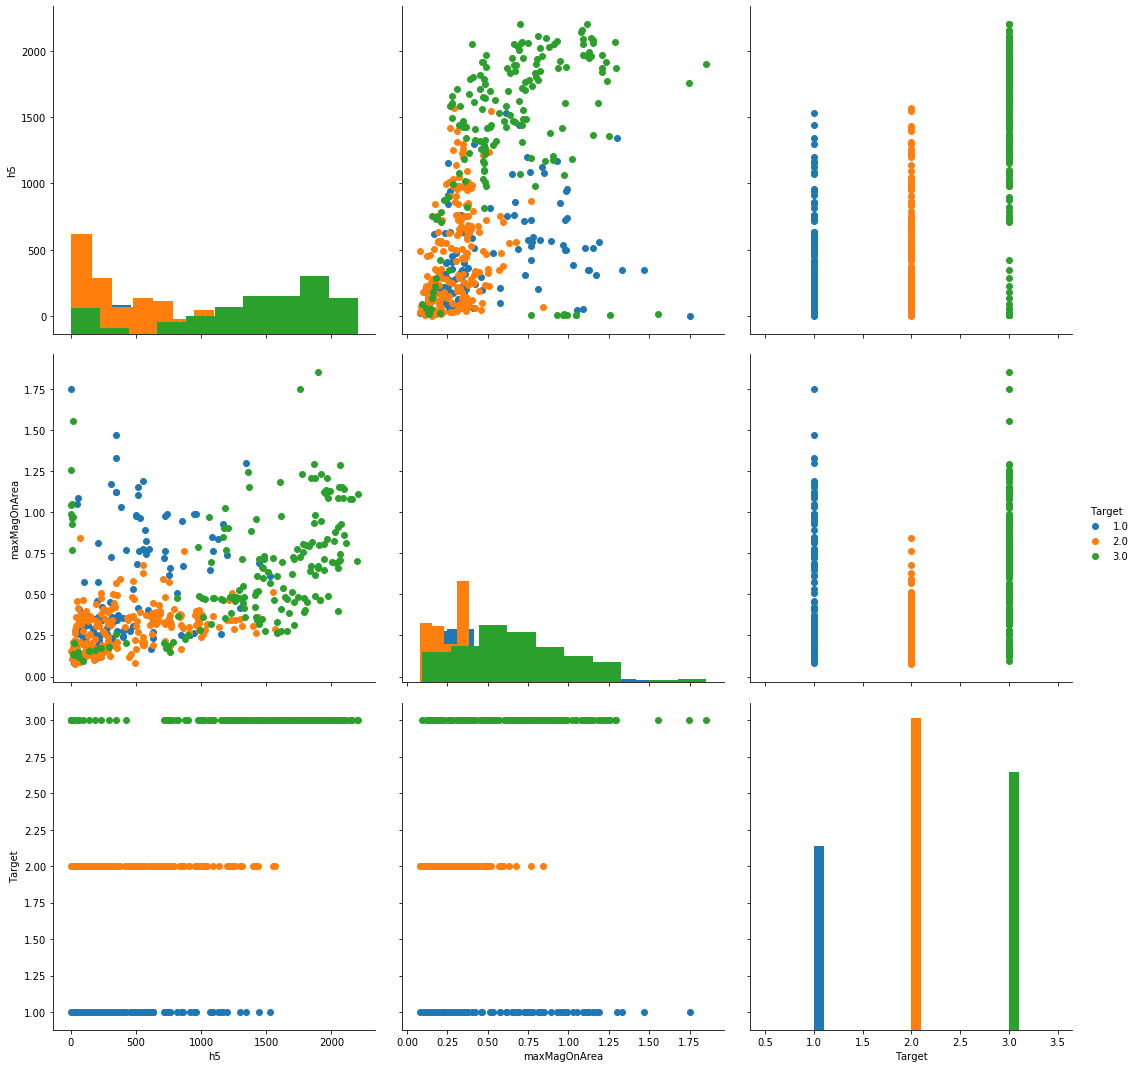

In [229]:
import seaborn as sns

g = sns.PairGrid(df[0:500][['h5','maxMagOnArea','Target']], hue="Target", height=5)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend();

# Training

In [188]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df[['h5','maxMagOnArea']], df[['Target']], test_size=0.33, random_state=seed)

X_train

,h5,maxMagOnArea
1967,119.0,0.352663
891,391.0,0.198376
1228,1496.0,1.026020
413,2060.0,1.154267
1883,2160.0,0.656716
...,...,...
1679,354.0,0.288088
2041,1284.0,0.978984
664,22.0,0.242008
1318,1081.0,0.663277


In [189]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [230]:
rf = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0)

parameters = {'max_depth':[1,2,3,4,5],}
gsCV = GridSearchCV(rf, parameters, cv=100, n_jobs=-1)
gsCV = gsCV.fit(X_train, y_train)

/home/marco/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/home/marco/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:715: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [231]:
gsCV.best_params_

{'max_depth': 4}

In [233]:
rf = RandomForestClassifier(n_estimators=1000, max_depth=4, random_state=seed)
scores = cross_val_score(rf, X_train, y_train, n_jobs=-1, cv=100)
np.mean(scores)

0.7483919413919415

In [234]:
rf.fit(X_train, y_train);

/home/marco/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


In [236]:
rf.score(X_test,y_test)

0.7330383480825958

# Explainability

In [237]:
import matplotlib;


from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#AAAAFF','#FFAAAA', '#AAFFAA'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])


X = X_test;
y = y_test;

Xy = pd.concat([X,y], axis=1);

x1_min, x1_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
x2_min, x2_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1



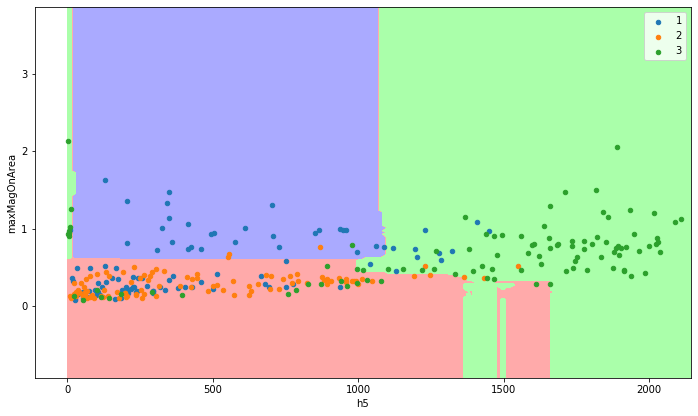

In [238]:
matplotlib.pyplot.figure(figsize=(40, 15))
plt.subplot(2, 3, 0 + 1)

xx1, yy1 = np.meshgrid(np.arange(x1_min, x1_max, (x1_max-x1_min)/200),
                     np.arange(x2_min, x2_max,  (x2_max-x2_min)/200))

Z = rf.predict(np.c_[xx1.ravel(), yy1.ravel()])
Z = Z.reshape(yy1.shape)
cs = plt.contourf(xx1, yy1, Z, cmap=cmap_light)

for i in range(1,4):
    plt.scatter(Xy[Xy['Target']==i].iloc[0:100,0], Xy[Xy['Target']==i].iloc[0:100,1],label=i, s=20, cmap=cmap_bold)

plt.xlabel(Xy.iloc[:,0].name)
plt.ylabel(Xy.iloc[:,1].name)
plt.axis("tight")
plt.legend()
plt.show()